## 1. INSTALL/IMPORT LIBRARIES

In [2]:
# Install Fred API library
%pip install fredapi > /dev/null

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import FRED
from fredapi import Fred

# Set FRED API key
from config import FREDKEY as fk
print(f"Your fred API key is: {fk}")



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Your fred API key is: 592e1401c1b3dd13827a914e77312c39


In [3]:
# Set matplotlib style
plt.style.use("fivethirtyeight")
palette = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Set a dark sns style:
styledic = {'figure.facecolor': 'gainsboro',
 'axes.labelcolor': '1',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'butt',
 'patch.edgecolor': 'b',
 'patch.force_edgecolor': True,
 'image.cmap': 'flare',
 'xtick.top': True,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#d6d6f9',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': True,
 'ytick.left': True}

sns.set_theme(style=styledic)
sns.set_context("notebook")
sns.set_palette("bright")


# Det Plotly style:
px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Viridis


## 2. CREATE FRED OBJECT

In [4]:
fred = Fred(api_key=fk)

## 3. UNEMPLOYMENT DATA

### 3.1. Search & pull data

In [5]:
# Search and pull results for "unemployment"
unemp_search = fred.search("unemployment", order_by="popularity", sort_order="desc")

# Check it out
print(f"Dataframe shape: {unemp_search.shape}")
unemp_search.head(3)

Dataframe shape: (1000, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-04-09,2024-04-09,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-03-12 07:42:02-05:00,95,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2024-04-09,2024-04-09,Unemployment Rate,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:02-05:00,95,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2024-04-09,2024-04-09,"All Employees, Total Nonfarm",1939-01-01,2024-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-04-05 07:52:01-05:00,83,"All Employees: Total Nonfarm, commonly known a..."


In [6]:
# Get the unemplyment rate series
dfunemp = fred.get_series(series_id="UNRATE")
# Print series
print("\nUSA unemployment % (monthly, since 1948):\n")
print(dfunemp)



USA unemployment % (monthly, since 1948):

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
Length: 915, dtype: float64


In [7]:
# Search and pull results for unemployment rate by state
unemp_search_df = fred.search("unemployment rate state", filter= ("frequency", "Monthly"))

# Check indesxes
print(f"\nResults for 'unemployment rate state':\n")
print(unemp_search_df.index)



Results for 'unemployment rate state':

Index(['UNRATE', 'UNRATENSA', 'LNS14000006', 'UNEMPLOY', 'LNU04000006',
       'U6RATE', 'CAUR', 'U6RATENSA', 'CAURN', 'TXUR',
       ...
       'FLOKAL7URN', 'CASTAN7URN', 'CTHART3URN', 'VASMYT3URN', 'AUBU201UR',
       'LNU04032220', 'SCMARI7URN', 'VAALBE7URN', 'HAGE124UR', 'MIINGH5URN'],
      dtype='object', name='series id', length=1000)


### 3.2. Fine tune search

In [8]:
# Query within that dataframe for the seasonally adjusted unemployment rate
print(f"\n Filtered by 'seasonally adjusted':\n")
unemp_df = unemp_search_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
print(unemp_df.index)


 Filtered by 'seasonally adjusted':

Index(['UNRATE', 'LNS14000006', 'U6RATE', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR',
       ...
       'LBSSA46', 'LNS14000089', 'M08311USM156SNBR', 'LNS13008397', 'LBSSA20',
       'LNS14000150', 'NEIPTERM156SFRBRIC', 'LBSSA10', 'LBSSA44',
       'LRUN25TTUSM156S'],
      dtype='object', name='series id', length=161)


In [9]:
# Get only those with "Unemployment Rate" in the title
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]
unemp_df = unemp_df[unemp_df.index.str.endswith("UR")]
print(unemp_df.index)

# Check titles
print(unemp_df.title)

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR',
       'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'],
      dtype='object', name='series id')
series id
CAUR                       Unemployment Rate in California
TXUR                            Unemployment Rate in Texas
NYUR                         Unemployment Rate in New York
FLUR                          Unemployment Rate in Florida
PAUR                     Unemployment Rate in Pennsylvania
OHUR                             Unemployment Rate in Ohio
MIUR                         Unemployment Rate in Michigan
ALUR                 

### 3.3. Clean data

In [10]:
# Take the field 'title' for each item,
# query the FRED API for series corresponding to each index code,
# make each series into a dataframe and assign it the previously extracted 'title'.
# Append the results to a list,
# print lenght of list and one example.

all_res = []

for i in unemp_df.index:
    title = unemp_df.loc[i, "title"]
    result = fred.get_series(i)
    result = result.to_frame(name=title)
    all_res.append(result)

print(len(all_res))
all_res[1]

57


,Unemployment Rate in Texas
1976-01-01,5.8
1976-02-01,5.8
1976-03-01,5.9
1976-04-01,5.9
1976-05-01,5.9
...,...
2023-10-01,3.9
2023-11-01,3.9
2023-12-01,3.9
2024-01-01,3.9


In [11]:
# Concatenate all dataframes in the list into a single dataframe
concatdf = pd.concat(all_res, axis=1)

# Take out the 'unemployment rate in ' part of the column names
concatdf.rename(columns=lambda x: x.replace('Unemployment Rate in ', ''), inplace=True)

# Drop the columns referring to bigger-than-state areas and rename the dataframe to just "df"
dropcolumns = concatdf.columns[concatdf.columns.str.contains('Census')]
df = concatdf.drop(columns=dropcolumns)

# Check the resulting dataframe columns to see if they are all states
lista = df.columns.to_list()
print(len(lista))
print(lista)

52
['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio', 'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois', 'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia', 'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee', 'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada', 'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota', 'Montana', 'the District of Columbia', 'Mississippi', 'Maine', 'Nebraska', 'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas', 'Wyoming', 'Delaware', 'Vermont', 'South Dakota']


In [12]:
# Check whether there are na values
print(df.isna().sum(axis=0).all)

<bound method NDFrame._add_numeric_operations.<locals>.all of California                  0
Texas                       0
New York                    0
Florida                     0
Pennsylvania                0
Ohio                        0
Michigan                    0
Alabama                     0
Massachusetts               0
North Carolina              0
Illinois                    0
New Jersey                  0
Georgia                     0
Colorado                    0
Arizona                     0
Wisconsin                   0
Virginia                    0
Kentucky                    0
South Carolina              0
New Mexico                  0
Minnesota                   0
Tennessee                   0
Washington                  0
Maryland                    0
Oregon                      0
West Virginia               0
Nevada                      0
Arkansas                    0
Oklahoma                    0
Missouri                    0
Alaska                      0
Iowa    

In [13]:
# Check where the NA values are in Puerto Rico
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["Puerto Rico"])

1976-01-01    19.6
1976-02-01    19.5
1976-03-01    19.3
1976-04-01    19.0
1976-05-01    18.9
1976-06-01    18.9
1976-07-01    19.1
1976-08-01    19.4
1976-09-01    19.8
1976-10-01    19.9
1976-11-01    19.8
1976-12-01    19.8
1977-01-01    19.8
1977-02-01    19.9
1977-03-01    20.2
1977-04-01    20.5
1977-05-01    20.7
1977-06-01    20.8
1977-07-01    20.6
1977-08-01    20.2
1977-09-01    19.7
1977-10-01    19.4
1977-11-01    19.2
1977-12-01    19.0
1978-01-01    18.7
1978-02-01    18.4
1978-03-01    18.0
1978-04-01    17.7
1978-05-01    17.4
1978-06-01    17.4
1978-07-01    17.5
1978-08-01    17.8
1978-09-01    18.1
1978-10-01    18.3
1978-11-01    18.4
1978-12-01    18.3
1979-01-01    18.0
1979-02-01    17.5
1979-03-01    17.1
1979-04-01    16.7
1979-05-01    16.4
1979-06-01    16.4
1979-07-01    16.5
1979-08-01    16.7
1979-09-01    17.0
1979-10-01    17.3
1979-11-01    17.5
1979-12-01    17.6
1980-01-01    17.5
1980-02-01    17.3
1980-03-01    17.1
1980-04-01    16.8
1980-05-01  

In [14]:
# Take the indexes of the rows with NA values in Puerto Rico
nulls = df.loc[df["Puerto Rico"].isnull()]
print(nulls.index)
listanulls = nulls.index.to_list() # Make them into a list
listanulls1 = []
for choclo in listanulls:
    x = str(choclo)
    print(x) # Check index string: it has time information (unnecessary)
    x = x[0:-9:] # Slice the string to remove time information
    print(x)
    listanulls1.append(x)
print(listanulls1)

DatetimeIndex(['2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)
2020-03-01 00:00:00
2020-03-01
2020-04-01 00:00:00
2020-04-01
['2020-03-01', '2020-04-01']


In [15]:
# Imputation: fill NA values in Puerto Rico with 9.0, filling in the progression,
# then display the series to confirm
for date in listanulls1:
    df["Puerto Rico"].at[date] = 9.0

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["Puerto Rico"])

1976-01-01    19.6
1976-02-01    19.5
1976-03-01    19.3
1976-04-01    19.0
1976-05-01    18.9
1976-06-01    18.9
1976-07-01    19.1
1976-08-01    19.4
1976-09-01    19.8
1976-10-01    19.9
1976-11-01    19.8
1976-12-01    19.8
1977-01-01    19.8
1977-02-01    19.9
1977-03-01    20.2
1977-04-01    20.5
1977-05-01    20.7
1977-06-01    20.8
1977-07-01    20.6
1977-08-01    20.2
1977-09-01    19.7
1977-10-01    19.4
1977-11-01    19.2
1977-12-01    19.0
1978-01-01    18.7
1978-02-01    18.4
1978-03-01    18.0
1978-04-01    17.7
1978-05-01    17.4
1978-06-01    17.4
1978-07-01    17.5
1978-08-01    17.8
1978-09-01    18.1
1978-10-01    18.3
1978-11-01    18.4
1978-12-01    18.3
1979-01-01    18.0
1979-02-01    17.5
1979-03-01    17.1
1979-04-01    16.7
1979-05-01    16.4
1979-06-01    16.4
1979-07-01    16.5
1979-08-01    16.7
1979-09-01    17.0
1979-10-01    17.3
1979-11-01    17.5
1979-12-01    17.6
1980-01-01    17.5
1980-02-01    17.3
1980-03-01    17.1
1980-04-01    16.8
1980-05-01  

<AxesSubplot:>

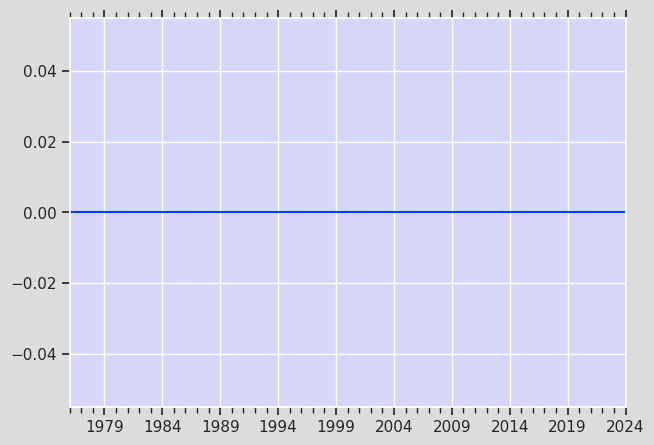

In [16]:
# Plot sum of isnull values along axis 1 to confirm that there are no more NA values
df.isnull().sum(axis=1).plot()

## 4. Plot data

#### USA UNEMPLOYMENT RATE 


USA unemployment % (monthly, since 1948):

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
Length: 915, dtype: float64


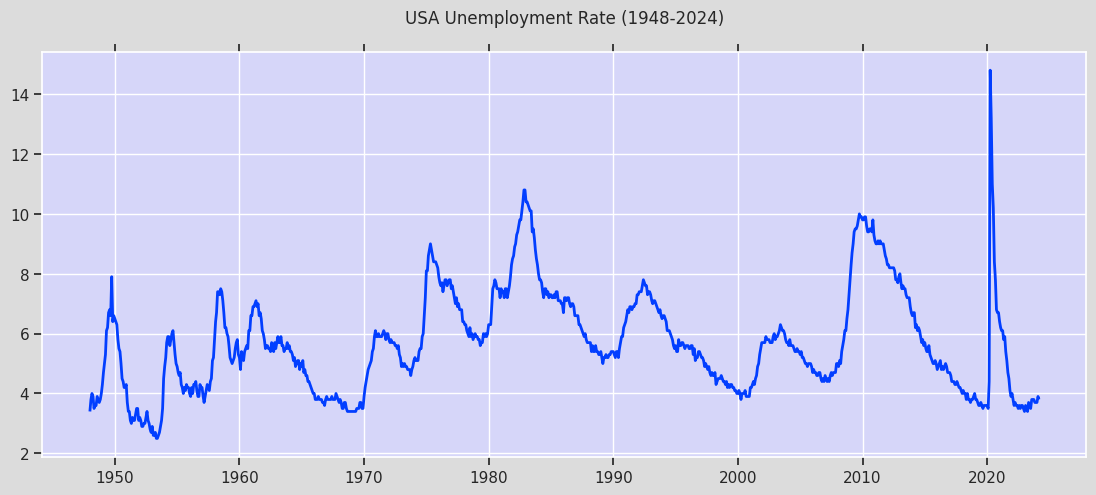

In [17]:
# Print USA unemployment rate series:
print("\nUSA unemployment % (monthly, since 1948):\n")
print(dfunemp)

# Plot unemployment rate in Seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(data=dfunemp, lw=2)
plt.title("USA Unemployment Rate (1948-2024)", x=0.5, y=1.05)
plt.show()

#### EVOLUTION OF UNEMPLOYMENT RATE BY STATE

In [32]:
# Plot evolution of unemployment rate per state in Plotly, starting in 2000:
df2000 = df.loc["2006-01-01"::]
fig3 = px.line(df2000, title="Unemployment Rate per State (2000-2024)",
              labels={"value": "Unemployment Rate (%)", "variable": "State", "index": "Year"},
              width=1000, height=600)

fig3.update_layout(paper_bgcolor='#DCDCDC') # set background color
fig3.update_layout(plot_bgcolor='#d6d6f9')

fig3.update_xaxes(tickangle=45,
                  tickvals=df2000.index[::12], tickmode="array") # set x-axis ticks to be every 12 months, on top

fig3.update_xaxes(dtick="M12", tickformat="%Y", ) # set x axis tick labels to be years only:

# Place legend below plot:
fig3.update_layout(legend=dict(
    orientation="h",
    #yanchor=,
    y=-.3,
    xanchor="right",
    x=1
))

fig3.show()


#### DETAIL OF UNEMPLOYMENT RATE IN APRIL 2020

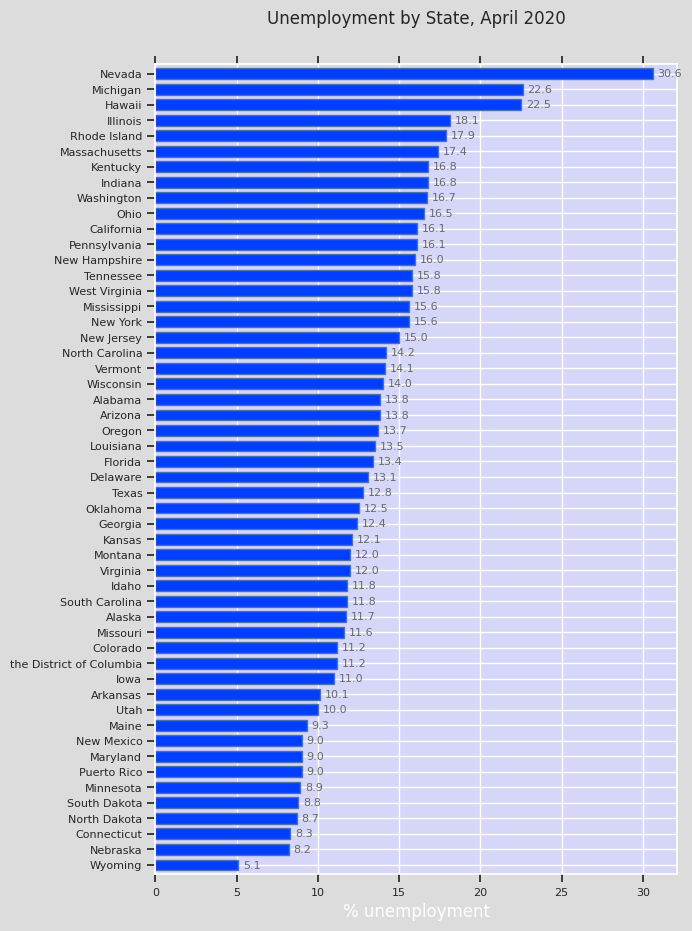

In [26]:
fig_april = df.loc[df.index == "2020-04-01"].T.sort_values("2020-04-01", ascending=True) \
    .plot(kind="barh", figsize=(6,10), width=0.7, fontsize=8)

fig_april.legend().remove()
fig_april.set_xlabel("% unemployment")
plt.title("Unemployment by State, April 2020", x=0.5, y=1.04)

# Add data labels:
for i in fig_april.patches:
    # get_width pulls left or right; get_y pushes up or down
    fig_april.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=8, color='dimgrey')

plt.show()

#### JUMP IN UNEMPLOYMENT BETWEEN APRIL-MARCH 2020 PER STATE

In [27]:
# Sort df columns alphabetically
df.sort_index(axis=1, inplace=True)

# Split df into four parts, with 12, 12, 13, and 13 states respectively:
df1 = df.iloc[:, :12]
df2 = df.iloc[:, 12:24]
df3 = df.iloc[:, 24:37]
df4 = df.iloc[:, 37:]


In [34]:
# Take the difference between April 2020 and March 2020, as a percentage of March 2020
dif = (df.loc['2020-04-01'] - df.loc['2020-03-01'])/df.loc['2020-03-01']*100
dif.sort_values(inplace=True)

dif = dif.round(2) # Round values to 2 decimal places
dif = dif.sort_index() # Reorder alphabetically
difpercent = dif.astype(str) + " % jump" # Change values from floting point to string, and add "% jump"

# Split the dif series in 12, 12, 13, 13, to match the previous splits of the df dataframe:
dif1 = difpercent.iloc[:12]
dif2 = difpercent.iloc[12:24]
dif3 = difpercent.iloc[24:37]
dif4 = difpercent.iloc[37:]

difpercent


Alabama                     305.88 % jump
Alaska                      112.73 % jump
Arizona                     181.63 % jump
Arkansas                    106.12 % jump
California                  192.73 % jump
Colorado                    239.39 % jump
Connecticut                 112.82 % jump
Delaware                     162.0 % jump
Florida                     226.83 % jump
Georgia                     235.14 % jump
Hawaii                      971.43 % jump
Idaho                       337.04 % jump
Illinois                     254.9 % jump
Indiana                      380.0 % jump
Iowa                        323.08 % jump
Kansas                      290.32 % jump
Kentucky                     300.0 % jump
Louisiana                   101.49 % jump
Maine                       190.62 % jump
Maryland                    164.71 % jump
Massachusetts                480.0 % jump
Michigan                    510.81 % jump
Minnesota                   147.22 % jump
Mississippi                 164.41

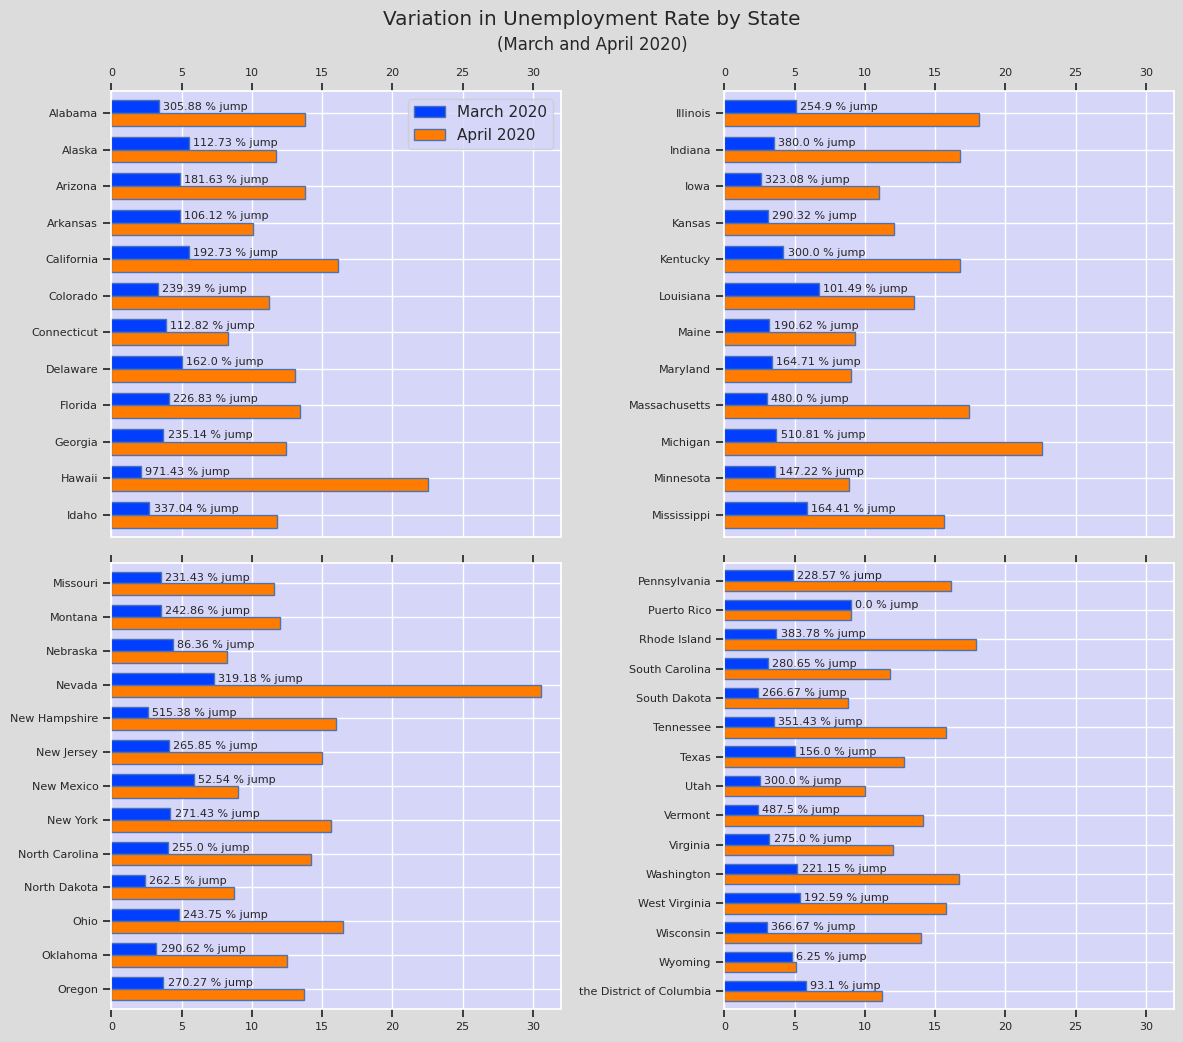

In [36]:
# Plot the four dataframes side by side:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

df1.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", width=0.7 ,ax=ax[0, 0], fontsize=8)
df2.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", width=0.7, ax=ax[0, 1], fontsize=8)
df3.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", width=0.7, ax=ax[1, 0], fontsize=8)
df4.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", width=0.7, ax=ax[1, 1], fontsize=8)

# Place smaller bar on top for all subplots:
ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()
ax[1,1].invert_yaxis()

# Remove legend from all but one:
ax[0,1].legend().remove()
ax[1,0].legend().remove()
ax[1,1].legend().remove()

# Keep same scale for all subplots:
ax[0,0].set_xlim(0, 32)
ax[0,1].set_xlim(0, 32)
ax[1,0].set_xlim(0, 32)
ax[1,1].set_xlim(0, 32)

# Set tick labels on the upper side for ax[0,0] and ax[0,1]:
ax[0,0].xaxis.tick_top()
ax[0,1].xaxis.tick_top()

# Make all ticks the same size:
ax[0,0].tick_params(axis="x", labelsize=8)
ax[0,1].tick_params(axis="x", labelsize=8)
ax[1,0].tick_params(axis="x", labelsize=8)
ax[1,1].tick_params(axis="x", labelsize=8)

# Use ax.bar_label to add the percentage change to the bars:
ax[0,0].bar_label(ax[0,0].containers[0],
    labels=dif1.values, fontsize=8, padding=3)
ax[0,1].bar_label(ax[0,1].containers[0],
    labels=dif2.values, fontsize=8, padding=3)
ax[1,0].bar_label(ax[1,0].containers[0],
    labels=dif3.values, fontsize=8, padding=3)
ax[1,1].bar_label(ax[1,1].containers[0],
    labels=dif4.values, fontsize=8, padding=3)

ax[0,0].legend(["March 2020", "April 2020"],
               loc="upper right") # Change legend to month names in ax 1

 # Adjust layout:
fig.tight_layout()
fig.suptitle("Variation in Unemployment Rate by State", x=0.5, y=1.04)
fig.text(0.5, 1, "(March and April 2020)", ha='center', fontsize=12)

plt.show()
